# **[Monte-Carlo simulation]**

In [ ]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt

In [ ]:
np.random.seed(1004)

In [ ]:
from google.colab import files
uploaded = files.upload()

v = pd.read_csv("v_simul.txt", header=None).to_numpy().reshape(-1 , )

Saving v_simul.txt to v_simul (5).txt


In [ ]:
T = 1
S0 = 100
V0 = 0.12
k = 2 #which is kappa for Q6~Q12
kappa = 2
theta =0.15
sigma = 0.8
r = 0
K = np.array([70, 90, 100, 110, 130])
N = np.array([100, 500, 1000, 5000, 10000])
N_max = 10000
delta_t_min = T/N_max

u1 = 0.5
u2 = -0.5
i_complex = complex(0,1)

# Define all functions needed
def C(s,v,t,T,k,r,N):
	x = np.log(s)
	P1 = P_1(x,v, t, T, k, r, N);
	P2 = P_2(x,v, t, T, k, r, N);
	P = s*P1 - k*np.exp(-r*(T-t))*P2;

	return P

def P(s,v,t,T,k,r,N):
	x = np.log(s)
	P1 = P_1p(x,v, t, T, k, r, N);
	P2 = P_2p(x,v, t, T, k, r, N);
	P = k*np.exp(-r*(T-t))*P1 - s*P2;

	return P


In [ ]:
def P_1(x,v, t,T,k,r,N): ##fixed
  # Define the truncation value for u
  trunc = np.ceil(N**(1/3));

  # Define the width of the quadrature subintervals
  Delta = trunc/N

  # Define the quadrature subinterval points
  u = np.arange(0, trunc+1, Delta) #Begin, End, Jumps
  u = u[1:N]

  # Compute the integrand of the integral
  f1 = np.exp(C_1(T-t, u, r) + D_1(T-t, u, r)*v + i_complex*u*x)
  integrand = np.exp(-i_complex*u*np.log(k))*f1/(i_complex*u)
  integrand = integrand.real
  df = pd.DataFrame(data=integrand)
  #integrand = df.fillna(0)
  return sum(integrand[1:(N-1)]*Delta)/np.pi + 0.5

def P_1p(x,v, t,T,k,r,N): ##fixed
  # Define the truncation value for u
  trunc = np.ceil(N**(1/3));

  # Define the width of the quadrature subintervals
  Delta = trunc/N

  # Define the quadrature subinterval points
  u = np.arange(0, trunc+1, Delta) #Begin, End, Jumps
  u = u[1:N]

  # Compute the integrand of the integral
  f1 = np.exp(C_2(T-t, u, r) + D_2(T-t, u, r)*v + i_complex*u*x)
  integrand = np.exp(-i_complex*u*np.log(k))*f1/(i_complex*u)
  integrand = integrand.real
  df = pd.DataFrame(data=integrand)
  #integrand = df.fillna(0)
  return -sum(integrand[1:(N-1)]*Delta)/np.pi + 0.5

u = np.arange(0, 10, 1)
u[1:5]

def P_2(x,v,t,T,k,r,N): ##fixed
  # Define the truncation value for u
  trunc = np.ceil(N**(1/3));

  # Define the width of the quadrature subintervals
  Delta = trunc/N

  # Define the quadrature subinterval points
  u = np.arange(0, trunc+1, Delta) #Begin, End, Jumps
  u = u[1:N]

  # Compute the integrand of the integral
  f2 = np.exp(C_2(T-t, u, r) + D_2(T-t, u, r)*v + i_complex*u*x)
  integrand = np.exp(-i_complex*u*np.log(k))*f2/(i_complex*u)
  integrand = integrand.real
  df = pd.DataFrame(data=integrand)
  #integrand = df.fillna(0)
  return sum(integrand[0:(N-1)]*Delta)/np.pi + 0.5


def P_2p(x,v,t,T,k,r,N): ##fixed
  # Define the truncation value for u
  trunc = np.ceil(N**(1/3));

  # Define the width of the quadrature subintervals
  Delta = trunc/N

  # Define the quadrature subinterval points
  u = np.arange(0, trunc+1, Delta) #Begin, End, Jumps
  u = u[1:N]

  # Compute the integrand of the integral
  f2 = np.exp(C_1(T-t, u, r) + D_1(T-t, u, r)*v + i_complex*u*x)
  integrand = np.exp(-i_complex*u*np.log(k))*f2/(i_complex*u)
  integrand = integrand.real
  df = pd.DataFrame(data=integrand)
  #integrand = df.fillna(0)
  return -sum(integrand[0:(N-1)]*Delta)/np.pi + 0.5

def C_1(tau,u,r): ##fixed
	d1 = np.sqrt(1 - (sigma**2)*(2*u1*u*i_complex - u**2))
	g1 = (kappa + d1)/(kappa - d1)
	return r*u*i_complex*tau + (0.5/sigma**2)*((1 + d1)*tau - 2*np.log((1 - g1*np.exp(d1*tau))/(1-g1)))

def C_2(tau,u,r): ##fixed
	d2 = np.sqrt(1 - (sigma**2)*(2*u2*u*i_complex - u**2))
	g2 = (kappa + d2)/(kappa - d2)
	return r*u*i_complex*tau + (0.5/sigma**2)*((1 + d2)*tau - 2*np.log((1 - g2*np.exp(d2*tau))/(1-g2)))

def D_1(tau,u,r) :
	d1 = np.sqrt(kappa**2 - (sigma**2)*(2*u1*u*i_complex - u**2))
	g1 = (kappa + d1)/(kappa - d1)
	return ((kappa + d1)/(sigma**2))*((1 - np.exp(d1*tau))/(1 - g1*np.exp(d1*tau)))

def D_2(tau,u,r) :
	d2 = np.sqrt(kappa**2 - (sigma**2)*(2*u2*u*i_complex - u**2))
	g2 = (kappa + d2)/(kappa - d2)
	return ((kappa + d2)/(sigma**2))*((1 - np.exp(d2*tau))/(1 - g2*np.exp(d2*tau)))


In [ ]:
call = np.zeros((5,5))
put = np.zeros((5,5))
ST = np.zeros((5,5))
time_table = np.zeros((5,5))

for K_loop in np.arange(0,5,1):
    K_1 = K[K_loop]

    for N_loop in np.arange(0,5,1):
        N_1 = N[N_loop]
        time_0 = time.time()

        choose = [int(n) for n in np.ceil(np.random.uniform(size=N_1) * (10000-1))]
        v_1 = v[choose]
        ST_Temp = np.array([])
        call_Temp = np.array([])
        put_Temp = np.array([])

        for i in range(0, N_1, 1):
            z = np.random.normal(loc =0, scale= np.sqrt(v_1[i]), size=1)
            sT = r * T - 0.5 * v_1[i] + z
            ST_Temp = np.append(ST_Temp, S0 * np.exp(sT))
            call_Temp = np.append(call_Temp, max(S0 * np.exp(sT) - K_1, 0))
            put_Temp = np.append(put_Temp, max(K_1 - S0 * np.exp(sT), 0))

        time_1 = time.time()

        time_table[K_loop, N_loop] = time_1 - time_0
        ST[K_loop, N_loop] = np.mean(ST_Temp)
        call[K_loop, N_loop] = np.mean(call_Temp)
        put[K_loop, N_loop] = np.mean(put_Temp)

**9) Calculation of initial price and Monte-Carlo estimator**

In [ ]:
K_all = np.array([70, 90, 100, 110, 130])
N_all = np.array([100, 500, 1000, 5000, 10000])

initial_price_p = np.zeros((len(K_all), len(N_all)))
for i in range(0,len(K_all) ,1):
	for j in range(0,len(N_all),1):
		initial_price_p[i,j] = P(S0,V0, 0, 1, K_all[i], r, 10**5)
initial_price_p

array([[-2.23966927, -2.23966927, -2.23966927, -2.23966927, -2.23966927],
       [ 6.18014788,  6.18014788,  6.18014788,  6.18014788,  6.18014788],
       [11.4306159 , 11.4306159 , 11.4306159 , 11.4306159 , 11.4306159 ],
       [17.2909871 , 17.2909871 , 17.2909871 , 17.2909871 , 17.2909871 ],
       [30.45261981, 30.45261981, 30.45261981, 30.45261981, 30.45261981]])

In [ ]:
for i in range(5):
  print(put[i,])

[2.62715752 2.3215381  2.4885895  2.81778567 2.63575844]
[7.60944982 8.70424629 9.08533493 8.99429916 9.16291153]
[11.59767671 13.5963452  13.19296734 13.61990416 13.92512182]
[19.17325181 18.66767219 20.89144312 20.97039689 19.89893367]
[30.99396219 37.00249562 35.8603949  35.84647273 35.67190443]


**9) Calculation of MSE of Monte-Carlo estimator**

In [ ]:
error_p = np.zeros((5,5))

for i in range(5):
    error_p[i,] = put[i,] - initial_price_p[i,3]

MSE = error_p**2


In [ ]:
print(MSE)

[[19.11826031 23.47396919 23.09275317 24.54482451 24.15777515]
 [ 5.46886954  9.05751676  4.69716369  7.8757196   7.35990247]
 [ 6.72192343  7.98164868  2.85241071  7.04316153  6.5288209 ]
 [11.29281073 11.36648686  3.51500524  9.40026433  9.07166503]
 [27.72661902 38.30161683 12.87597773 26.51314542 27.18861633]]


**10) MSE-time**

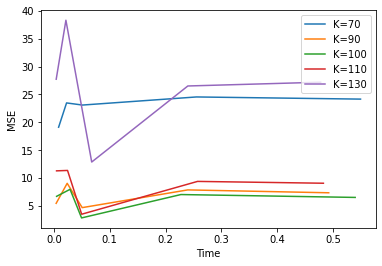

In [ ]:
for i in range(5):
    plt.plot(time_table[i,],MSE[i,])

plt.xlabel('Time')
plt.ylabel('MSE')
plt.legend(("K=70", "K=90", "K=100", "K=110","K=130"))

plt.show()

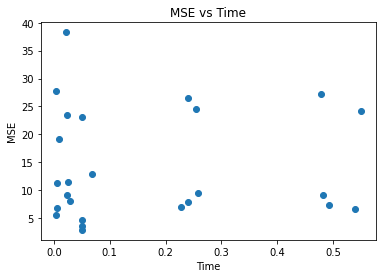

In [ ]:
plt.scatter(time_table,MSE)
plt.title("MSE vs Time")
plt.xlabel('Time')
plt.ylabel('MSE')
plt.show()

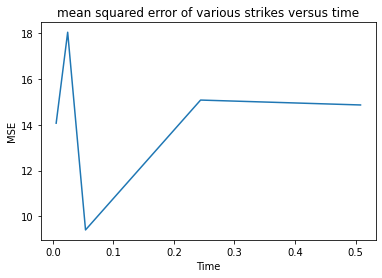

In [ ]:
MSE_N = np.zeros((1,5))
time_N = np.zeros((1,5))


for i in range(5):
    MSE_N[0, i] = sum(MSE[:,i])/5
    time_N[0, i] = sum(time_table[:,i])/5


plt.plot(*time_N,*MSE_N)
plt.xlabel("Time")
plt.ylabel("MSE")
plt.title("mean squared error of various strikes versus time")
plt.show()

**12) kappa = 0.5**
# Repeat above process with k = 2
(In this programming code, k means kappa.)